# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Построение модели

## Содержание

<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

### Импортирование данных

In [40]:
import pandas as pd

data = pd.read_csv("./Churn.csv")

display(data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [41]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

### Описание данных


**Признаки:**

`RowNumber` — индекс строки в данных

`CustomerId` — уникальный идентификатор клиента

`Surname` — фамилия

`CreditScore` — кредитный рейтинг

`Geography` — страна проживания

`Gender` — пол

`Age` — возраст

`Tenure` — сколько лет человек является клиентом банка

`Balance` — баланс на счёте

`NumOfProducts` — количество продуктов банка, используемых клиентом

`HasCrCard` — наличие кредитной карты

`IsActiveMember` — активность клиента

`EstimatedSalary` — предполагаемая зарплата

**Целевой признак:**

`Exited` — факт ухода клиента

### Редактирование данных

Удалим первый столбец за ненадобностью:

In [42]:
data = data.drop('RowNumber', axis=1)

Приведем к порядковому кодированию некоторые столбцы:

In [43]:
# объявление столбцов
columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
data = pd.get_dummies(data, columns=columns, drop_first=True, dtype=int)

Добавим столбец `Tenure`, чтобы засчитать за отдельное значение пропуски, поскольку их достаточно много (10% от всех объектов)

In [44]:
data = pd.get_dummies(data, columns=['Tenure'], drop_first=True, dummy_na=True, dtype=int)
display(data.head())

,CustomerId,Surname,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,...,Tenure_2.0,Tenure_3.0,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0,Tenure_nan
0,15634602,Hargrave,619,42,0.00,1,101348.88,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,15647311,Hill,608,41,83807.86,1,112542.58,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,15619304,Onio,502,42,159660.80,3,113931.57,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,15701354,Boni,699,39,0.00,2,93826.63,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15737888,Mitchell,850,43,125510.82,1,79084.10,0,0,1,...,1,0,0,0,0,0,0,0,0,0


Масштабируем числовые признаки:

In [45]:
# импорт класса
from sklearn.preprocessing import StandardScaler

# объявление столбцов
numeric = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# масштабирование
scaler = StandardScaler()
scaler.fit(data[numeric])
data[numeric] = scaler.fit_transform(data[numeric])
display(data.head())

,CustomerId,Surname,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,...,Tenure_2.0,Tenure_3.0,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0,Tenure_nan
0,15634602,Hargrave,-0.326221,0.293517,-1.225848,-0.911583,0.021886,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,15647311,Hill,-0.440036,0.198164,0.117350,-0.911583,0.216534,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,15619304,Onio,-1.536794,0.293517,1.333053,2.527057,0.240687,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,15701354,Boni,0.501521,0.007457,-1.225848,0.807737,-0.108918,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15737888,Mitchell,2.063884,0.388871,0.785728,-0.911583,-0.365276,0,0,1,...,1,0,0,0,0,0,0,0,0,0


### Разделение данных

In [46]:
# импорт функции
from sklearn.model_selection import train_test_split 

# уберем первые три столбца как невлияющие факторы
features = data.drop(['Exited', 'Surname', 'CustomerId'], axis=1)
target = data['Exited']

# выделим тестовую выборку
f_left, f_test, t_left, t_test = train_test_split(features, target, 
                                                  test_size=0.2, random_state=12)

# разделим оставшуюся выборку на тренировочную и проверочную
f_train, f_valid, t_train, t_valid = train_test_split(f_left, t_left, 
                                                      test_size=0.25, random_state=12)

## Исследование задачи

### Общие сведения

Данная задача относится к задаче классификации, будем применять модели решающего дерева, случайного леса и логистическую модель, в качестве метрики качества будем использовать F1-меру

In [47]:
# исследуем баланс классов
print('Количество ушедших клиентов:', target.sum(), 
      '\nПроцентное соотношение:', target.sum()/len(data))

Количество ушедших клиентов: 2037 
Процентное соотношение: 0.2037


Наблюдается дисбаланс значений в целевом признаке, подготовим модели без учета дисбаланса

### Логистическая модель

In [48]:
# импорт класса и функции посчета f1-меры
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

logistic_model = LogisticRegression()
logistic_model.fit(f_train, t_train)
print('Результат логистической модели:',
      f1_score(logistic_model.predict(f_valid), t_valid))

Результат логистической модели: 0.26465028355387527


### Модель решающего дерева

In [49]:
# импорт класса
from sklearn.tree import DecisionTreeClassifier

best_tree_model = None
best_depth = 0
best_score = 0

# цикл для подбора глубины
for depth in range(1, 16):
    tree_model = DecisionTreeClassifier(random_state=12, max_depth=depth)
    tree_model.fit(f_train, t_train)
    score = f1_score(tree_model.predict(f_valid), t_valid)
    if score > best_score:
        best_score = score
        best_depth = depth
        best_tree_model = tree_model

print('Наилучший результат решающего дерева:', best_score, 'при глубине', best_depth)

Наилучший результат решающего дерева: 0.5734664764621968 при глубине 7


### Модель случайного леса

In [50]:
# импорт класса
from sklearn.ensemble import RandomForestClassifier

best_forest_model = None
best_rand_depth = 0
best_score = 0
best_est = 0

# сначала подберем оптимальную глубину при 25 деревьях
for depth in range(1, 16):
    forest_model = RandomForestClassifier(random_state=12, 
                                             max_depth=depth, 
                                             n_estimators=25)
    forest_model.fit(f_train, t_train)
    score = f1_score(forest_model.predict(f_valid), t_valid)
    if score > best_score:
        best_score = score
        best_rand_depth = depth

print('Лучшая глубина:', best_rand_depth, 'с результатом', best_score)

Лучшая глубина: 13 с результатом 0.5773524720893143


In [51]:
for est in range(10, 70, 5):
    forest_model = RandomForestClassifier(random_state=12, 
                                             max_depth=best_rand_depth, 
                                             n_estimators=est)
    forest_model.fit(f_train, t_train)
    score = f1_score(forest_model.predict(f_valid), t_valid)
    if score > best_score:
        best_score = score
        best_est = est
        best_forest_model = forest_model

print('Наилучший результат случаного леса:', best_score, 
      'при глубине', best_rand_depth, 'и количестве деревьев', best_est)

Наилучший результат случаного леса: 0.5993690851735016 при глубине 13 и количестве деревьев 40


Наилучший показатель F1 показала модель случайного леса, при этом F1 уже больше 0.59

## Борьба с дисбалансом

### Взвешивание классов

In [52]:
# натренируем логистическую модель со взвешиванием
logistic_model = LogisticRegression(class_weight='balanced')
logistic_model.fit(f_train, t_train)
print('Результат логистической модели:',
      f1_score(logistic_model.predict(f_valid), t_valid))

Результат логистической модели: 0.47026532479414457


Результат логистической модели все еще низкий, хотя значительно вырос относительно несбалансированных данных, попробуем на модели решающего дерева с подобранными ранее гиперпараметрами:

In [53]:
tree_model = DecisionTreeClassifier(random_state=12, 
                                    max_depth=13, 
                                    class_weight='balanced')
tree_model.fit(f_train, t_train)
print(f1_score(tree_model.predict(f_valid), t_valid))

0.5080731969860065


Результат значительно ухудшился, что может свидетельствовать о переобучении, попробуем заново подобрать гиперпараметры:

In [54]:
best_tree_model = None
best_depth = 0
best_score = 0

# цикл для подбора глубины
for depth in range(1, 16):
    tree_model = DecisionTreeClassifier(random_state=12, 
                                        max_depth=depth, 
                                        class_weight='balanced')
    tree_model.fit(f_train, t_train)
    score = f1_score(tree_model.predict(f_valid), t_valid)
    if score > best_score:
        best_score = score
        best_depth = depth
        best_tree_model = tree_model

print('Наилучший результат решающего дерева:', best_score, 'при глубине', best_depth)

Наилучший результат решающего дерева: 0.5753694581280788 при глубине 6


Какого-то улучшение не последовало, перейдем к случайному лесу, попробуем с подобранными гиперпараметрами:

In [67]:
forest_model = RandomForestClassifier(random_state=12, max_depth=13, 
                                      n_estimators=40, class_weight='balanced')

forest_model.fit(f_train, t_train)

print(f1_score(forest_model.predict(f_valid), t_valid))

0.615595075239398


Результат значительно лучше, чем у других моделей

### Увеличение выборки

In [56]:
# раздление на положительные и отрицательные объекты
features_zeros = features[data['Exited'] == 0]
features_ones = features[data['Exited'] == 1]
target_zeros = target[data['Exited'] == 0]
target_ones = target[data['Exited'] == 1]

Отношение положительных к негативным - 1 к 5, тогда увеличим положительные в 5 раз:

In [57]:
features_upsampled = pd.concat([features_zeros] + [features_ones] * 5)
target_upsampled = pd.concat([target_zeros] + [target_ones] * 5)

In [58]:
# импорт функции перемешивания
from sklearn.utils import shuffle

# перемешивание данных
features_upsampled, target_upsampled = shuffle(
    features_upsampled, target_upsampled, random_state=12)

Разделим выборку на тестовую, валидационную и тренировочную

In [59]:
# выделим тестовую выборку
f_left_up, f_test_up, t_left_up, t_test_up = train_test_split(
    features_upsampled, target_upsampled, random_state=12, test_size=0.25
)

# разделим на тренировочную и валидационную выборки
f_train_up, f_valid_up, t_train_up, t_valid_up = train_test_split(
    f_left_up, t_left_up, random_state=12, test_size=0.25
)

Применим случайный лес с теми же гиперпараметрами

In [88]:
forest_model_upsampled = RandomForestClassifier(random_state=12, 
                                               max_depth=13, 
                                               n_estimators=40)

forest_model_upsampled.fit(f_train_up, t_train_up)
print('На увеличенной валидационной выборке:')
print(f1_score(forest_model_upsampled.predict(f_valid_up), t_valid_up))
print('На изначальной валидационной выборке:')
print(f1_score(forest_model_upsampled.predict(f_valid), t_valid))

На увеличенной валидационной выборке:
0.8986022871664548
На изначальной валидационной выборке:
0.8


Показатели значительно улучшились, хотя модель явно переобучена

### Уменьшение выборки

In [61]:
# отношение назначим 1 к 5
features_downsampled = pd.concat(
    [features_zeros.sample(frac=0.2, random_state=12)] + [features_ones])
target_downsampled = pd.concat(
    [target_zeros.sample(frac=0.2, random_state=12)] + [target_ones])

# перемешивание данных
features_downsampled, target_downsampled = shuffle(
    features_downsampled, target_downsampled, random_state=12)

In [62]:
# разделение выборок
f_left_down, f_test_down, t_left_down, t_test_down = train_test_split(
    features_downsampled, target_downsampled, random_state=12, test_size=0.25)

f_train_down, f_valid_down, t_train_down, t_valid_down = train_test_split(
    f_left_down, t_left_down, random_state=12, test_size=0.25)

In [85]:
forest_model_downsampled = RandomForestClassifier(random_state=12, 
                                               max_depth=13, 
                                               n_estimators=40)

forest_model_downsampled.fit(f_train_down, t_train_down)
print('На увеличенной валидационной выборке:')
print(f1_score(forest_model_downsampled.predict(f_valid_down), t_valid_down))
print('На изначальной валидационной выборке:')
print(f1_score(forest_model_downsampled.predict(f_valid), t_valid))

На увеличенной валидационной выборке:
0.7925033467202143
На изначальной валидационной выборке:
0.6294067067927773


Результат чуть хуже, чем у увеличенной выборки

### Выбор лучшей модели

В качестве метрики выберем значение ROC-AUC:

In [132]:
# импорт метрики
from sklearn.metrics import roc_auc_score

# проверим на тестовой
print('ROC-AUC для')
print('Взвешенной модели:', 
      roc_auc_score(forest_model.predict(f_valid), t_valid))
print('Увеличенной выборки:', 
      roc_auc_score(forest_model_upsampled.predict(f_valid_up), t_valid_up))
print('Уменьшенной выборки:',
      roc_auc_score(forest_model_downsampled.predict(f_valid_down), t_valid_down))

ROC-AUC для
Взвешенной модели: 0.7874525513224084
Увеличенной выборки: 0.8887584168883728
Уменьшенной выборки: 0.7708624179812927


Построим ROC-кривые для наглядности:

In [94]:
# получим предсказания для каждой модели
proba_valid = forest_model.predict_proba(f_valid)
proba_valid_up = forest_model_upsampled.predict_proba(f_valid_up)
proba_valid_down = forest_model_downsampled.predict_proba(f_valid_down)

In [119]:
from sklearn.metrics import roc_curve

# вычисления кривых
fpr_balanced, tpr_balanced, trh = roc_curve(t_valid, proba_valid[:, 1:])
fpr_upsampled, tpr_upsampled, trh = roc_curve(t_valid_up, proba_valid_up[:, 1:])
fpr_downsampled, tpr_downsampled, trh = roc_curve(t_valid_down, proba_valid_down[:, 1:])

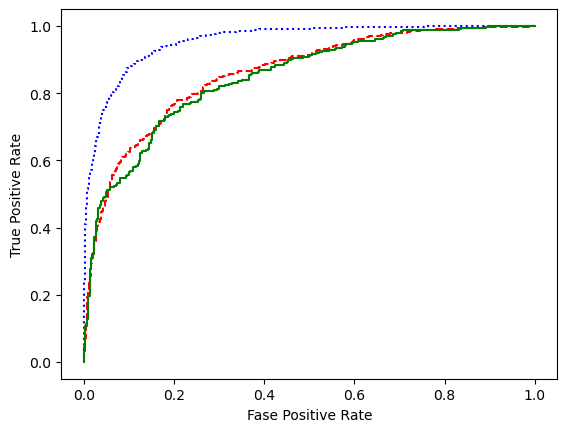

In [121]:
# импорт библиотеки для визуализаций
import matplotlib.pyplot as plt

plt.plot(fpr_balanced, tpr_balanced, linestyle='--', color='red')
plt.plot(fpr_upsampled, tpr_upsampled, linestyle=':', color='blue')
plt.plot(fpr_downsampled, tpr_downsampled, color='green')
plt.ylabel('True Positive Rate')
plt.xlabel('Fase Positive Rate')
plt.show()

Плавность кривой, как-таки не странно, у модели, выученной по увеличенной выборке, по остальным показателям результаты также лучше у нее

### Изменение порога

Попробуем подобрать порог для лучшей модели:

In [145]:
# импорт функций для подсчета recall и precision
from sklearn.metrics import recall_score, precision_score

# напишем функцию для посчета f1-меры по формуле
def calculate_f1(predicted_ones, true_ones):
    recall = recall_score(predicted_ones, true_ones)
    precision = precision_score(predicted_ones, true_ones)
    return (2 * recall * precision) / (recall + precision)

In [141]:
# импорт функции для прохода по дробным
from numpy import arange

best_f1 = 0
best_threshold = 0
proba_one_valid = proba_valid_up[:, 1:]

for threshold in arange(0, 1, 0.005):
    f1 = calculate_f1(proba_one_valid > threshold, t_valid_up)
    if f1 > best_f1:
        best_threshold = threshold
        best_f1 = f1

print('Лучший результат:', best_f1, 'при пороге', best_threshold)

Лучший результат: 0.9021516393442623 при пороге 0.51


## Тестирование модели

Проверим значения f1-меры итоговой модели на тестовой выборке:

In [146]:
print('Результат для валидационной выборки:', best_f1)
print('Для изначальной тестовой выборки:', 
      calculate_f1(forest_model_upsampled.predict_proba(f_test)[:, 1:] > best_threshold, 
                   t_test))
print('Для увеличенной тестовой выборки:',
      calculate_f1(forest_model_upsampled.predict_proba(f_test_up)[:, 1:] > best_threshold, 
                   t_test_up))

Результат для валидационной выборки: 0.9021516393442623
Для изначальной тестовой выборки: 0.8258706467661691
Для увеличенной тестовой выборки: 0.9017142857142859


F1-мера на увеличенной валидационной выборке и на увеличенной тестовой практически не отличается, однако результат на изначальной тестовой выборке хуже, что свидетельствует о переобучении на увеличенных данных, отражая основную проблему выбранного метода борьбы с дисбалансом

# Вывод

Удалось построить модель случайного леса, обученную на увеличенной выборке, и с подобранным порогом так, чтобы f1-мера была равна 0.826, что значительно выше поставленного порога в 0.59.